In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

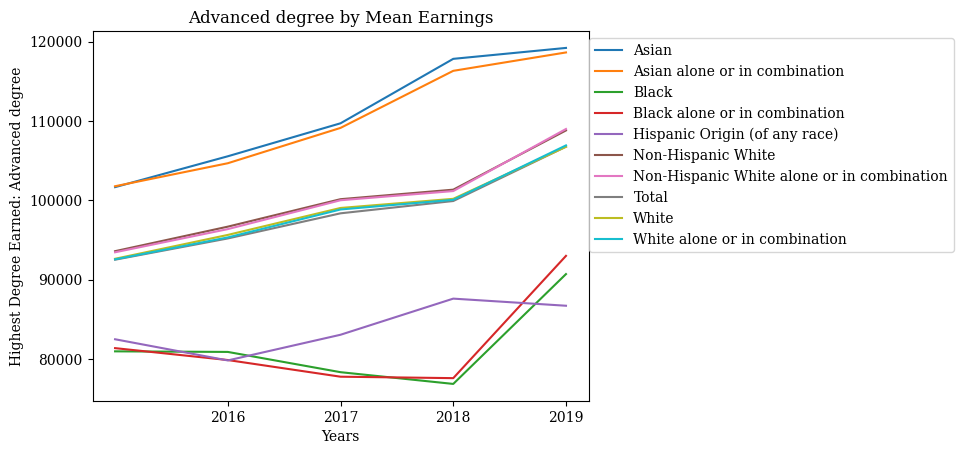

<Figure size 640x480 with 0 Axes>

In [5]:
df = pd.read_pickle('clean-pickle/taba-3.pkl')
def random_graph():    
    legend = []
    first_level = df.columns.levels[0]
    random_num = random.randint(0,5)
    rand_column = first_level[random_num]
    for groups in df.index.levels[0]:    
        for index in ['Both Sexes']:     
            try:
                plt.plot([i for i in range(2015, 2020)], df[rand_column].loc[groups, index, [str(i) for i in range(2015, 2020)]]['Mean'])
                legend.append((groups))
            except:
                plt.plot([i for i in range(2015, 2020)], df[rand_column].loc[groups, 'Both sexes', [str(i) for i in range(2015, 2020)]]['Mean'])
                legend.append((groups))

    plt.legend(legend, loc='upper right', bbox_to_anchor=(1.75, 1))
    plt.xticks([i for i in range(2016, 2020)])
    plt.xlabel('Years')
    plt.ylabel('Highest Degree Earned: ' + str(rand_column))
    plt.title(f'{rand_column} by Mean Earnings');
    plt.figure()
random_graph()


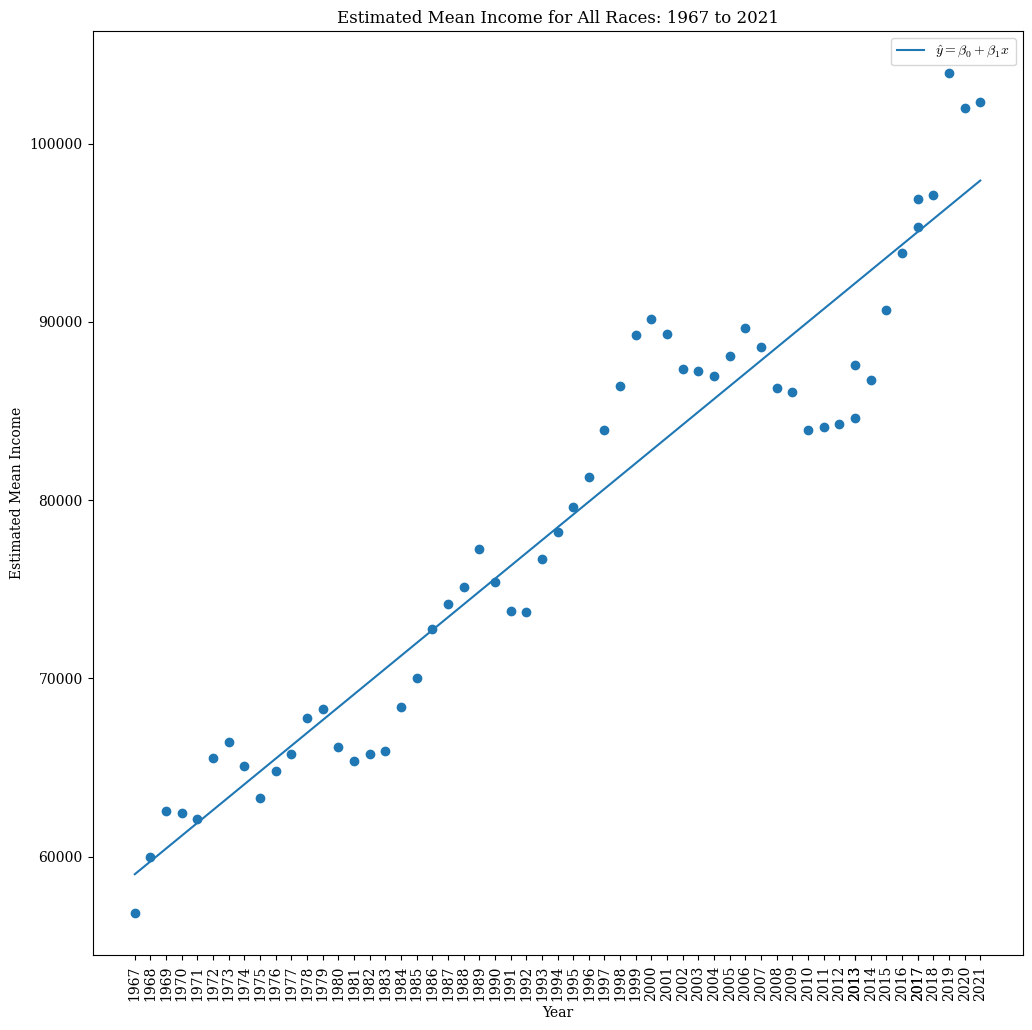

In [3]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


df = pd.read_pickle("clean-pickle/table-A2.pkl") # Unpickle in dataframe

y = df.loc['All Races']['Mean Income']['Estimate'].sort_index() # Sort from years 1967-2021
x = list(y.index)
for i in range(0, len(x)):
    x[i] = int(x[i]) # Convert each string to an integer

x = np.array(x).reshape(-1, 1) # We have one feature so we must use reshape(-1, 1)
y = np.array(y)



lr = LinearRegression().fit(x, y) # Linear fit of the data

t = np.linspace(1967, 2021, 1000) # Variable for ploting
y_hat = lr.intercept_ + lr.coef_ * t # Our linear fit



fig = plt.figure(figsize=(12, 12))
plt.rcParams['mathtext.fontset'] = 'cm' # Use Computer Modern
plt.rcParams['font.family'] = ['serif'] # I cannot stand the default font

plt.title('Estimated Mean Income for All Races: 1967 to 2021')
plt.scatter(x, y) # Scatter plot mean income
plt.plot(t, y_hat, label=r'$\hat{y} = \beta_{0} + \beta_{1}x$') # Plot regression function 
plt.xlabel('Year')
plt.xticks(x)
plt.ylabel('Estimated Mean Income')
plt.legend()
plt.xticks(rotation=90);

White Alone Not Hispanic


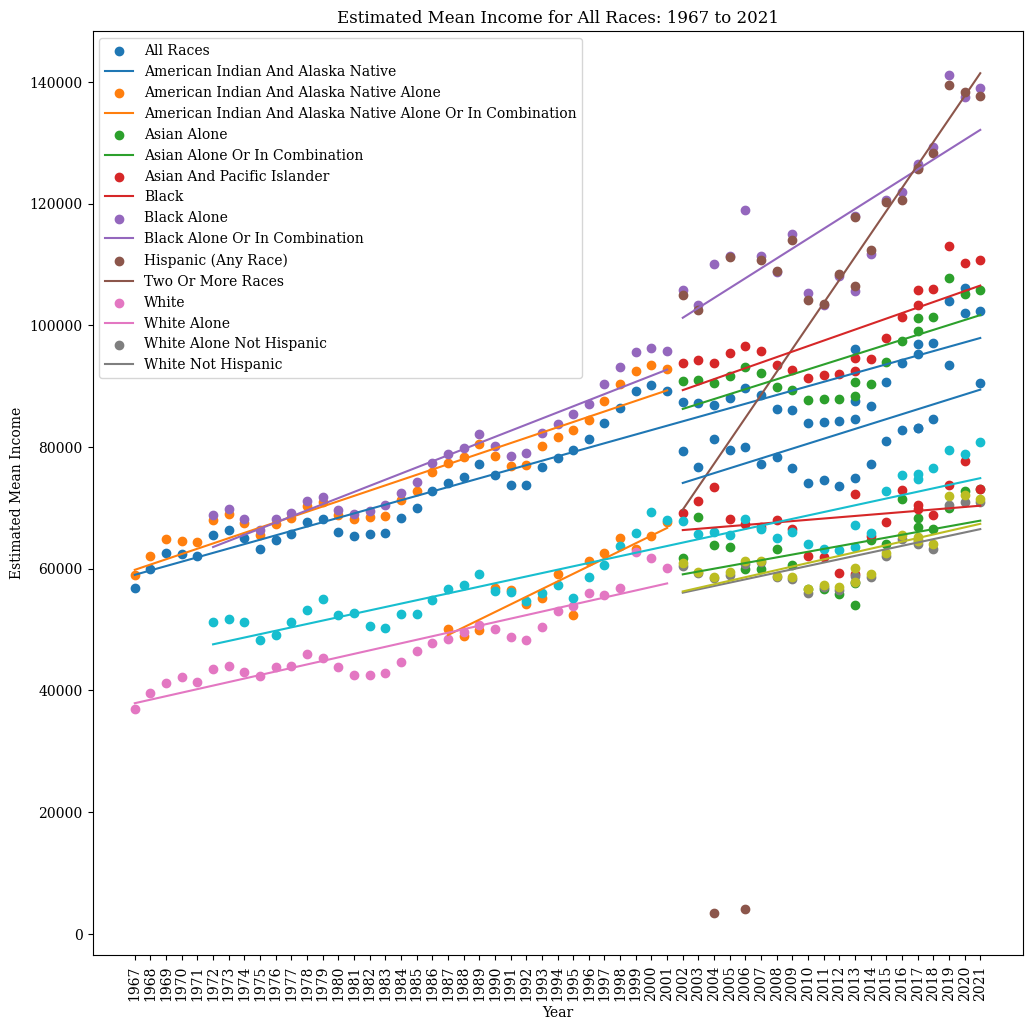

In [4]:
keys = list(df.index.levels[0])

fig = plt.figure(figsize=(12, 12))
plt.rcParams['mathtext.fontset'] = 'cm' # Use Computer Modern
plt.rcParams['font.family'] = ['serif'] # I cannot stand the default font
plt.title('Estimated Mean Income for All Races: 1967 to 2021')
years = [i for i in range(1967, 2022)]

for i in range(0, len(keys)):
    try:
        y = df.loc[keys[i]]['Mean Income']['Estimate'].sort_index() # Sort from years 1967-2021
        x = list(y.index)
        for i in range(0, len(x)):
            x[i] = int(x[i]) # Convert each string to an integer

        x = np.array(x).reshape(-1, 1) # We have one feature so we must use reshape(-1, 1)
        y = np.array(y)



        lr = LinearRegression().fit(x, y) # Linear fit of the data

        t = np.linspace(min(x), max(x), 1000) # Variable for ploting
        y_hat = lr.intercept_ + lr.coef_ * t # Our linear fit



        plt.scatter(x, y) # Scatter plot mean income
        plt.plot(t, y_hat) # Plot regression function 
        plt.xlabel('Year')
        plt.xticks(years)
        plt.ylabel('Estimated Mean Income')
        plt.xticks(rotation=90);
    except:
        print(keys[i])
    plt.legend(keys)